<a href="https://colab.research.google.com/github/vigneshlakshh/vigneshlakshh/blob/main/NNHandwrittenDig_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras  #loading keras that is within keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()    #loading the dataset

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
len(X_train)  

60000

In [5]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]   ####before it was 2-dimensional  ##flatenning required

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

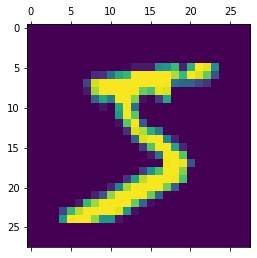

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]   ##its a simple array no flatnening required

5

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
len(X_train)

60000

In [29]:
X_train=X_train/255
X_test=X_test/255    #dividing by 255 to scale the data which will improve the accuracy of model

In [30]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)   #flatenenting the (6000,784)   #flatenenting the (6000,784)
X_train_flattened.shape



(60000, 784)

In [31]:
X_test_flattened.shape

(10000, 784)

In [32]:
X_train_flattened[0] ####now it is 1-dimensional #after flatening

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
##creating simple NN with 784 input elements and 10 output elements
model =keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #####1)  ##layers.dense tells all nodes areconnceted #10 no of o/p layers 784 i/p layer
])
#optimizer-helps to train efficinetly global optima ,loss=likeMSEany error can be used #aim is to make more accurate  ########2
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5) ########3 epochs is no of iteration our NN will run #Xtrain Ytrain
  

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4715 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9261


In [34]:
model.evaluate(X_test_flattened, y_test)   ##Xtest Ytest

313/313 [==============================] - 1s 1ms/step - loss: 0.2677 - accuracy: 0.9246


[0.26769134402275085, 0.9246000051498413]

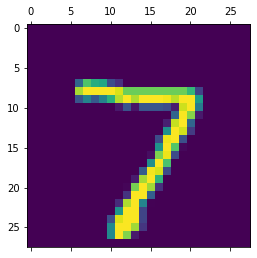

In [37]:
plt.matshow(X_test[0])

In [39]:
y_predicted= model.predict(X_test_flattened)  #for all my sample images ##DOING SAMPLE PREDICTIONS TO TEST MODEL
y_predicted[0]  #which is 7

array([3.1050295e-02, 4.2042683e-07, 5.6148171e-02, 9.6574461e-01,
       2.5233328e-03, 9.9248052e-02, 1.6917077e-06, 9.9987847e-01,
       1.0397580e-01, 7.0543802e-01], dtype=float32)

In [ ]:
##above 10 values gives the o/p of NN , The max values tell which no is taht

In [40]:
##WE CAN USE NUMPY TO THE MAX VALUE FROM THE ABOVE LIST OF ARRAY  #this is done only for one value
np.argmax(y_predicted[0])   #gives 7 therefore its correct 

7

In [43]:
y_predicted_labels = [np.argmax(i)for i in y_predicted] #doing argamx for all dATA and using list comprehension in PY
y_predicted_labels[0:5]   

[7, 2, 1, 0, 4]

In [44]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
#########confusion matrix##########

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   11,  922,   19,    8,    4,   13,   10,   33,    5],
       [   3,    0,   17,  929,    0,   22,    3,   12,   16,    8],
       [   1,    1,    3,    2,  910,    0,   11,    5,    8,   41],
       [   8,    3,    2,   34,    7,  781,   16,    9,   25,    7],
       [  10,    3,    6,    1,    7,   15,  912,    2,    2,    0],
       [   1,    6,   21,    7,    3,    0,    0,  960,    1,   29],
       [  10,   13,    7,   26,    9,   43,    9,   13,  834,   10],
       [  11,    7,    1,   12,   22,    6,    0,   28,    4,  918]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

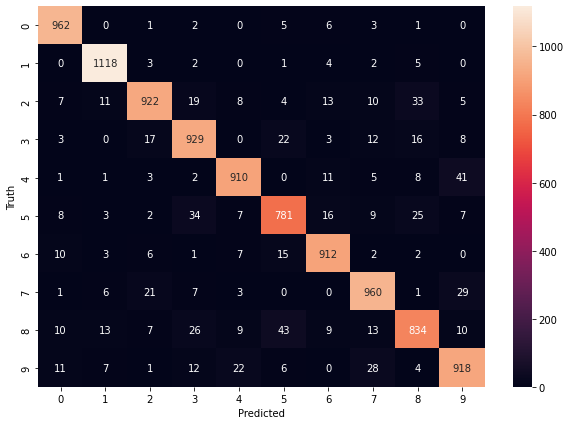

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')  #passing CM HERE into seaborn for nice visual
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
##########NOW ADDING HIDDEN LAYER##############
model =keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),  ##new hidden layer #100<input state(784)
    keras.layers.Dense(10,activation='sigmoid')                    ## we can add more hidden layers also
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1229 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0529 - accuracy: 0.9839


In [49]:
model.evaluate(X_test_flattened, y_test)   #97 %accurate  than previous 92%

313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9736


[0.08782485872507095, 0.9735999703407288]

Text(69.0, 0.5, 'Truth')

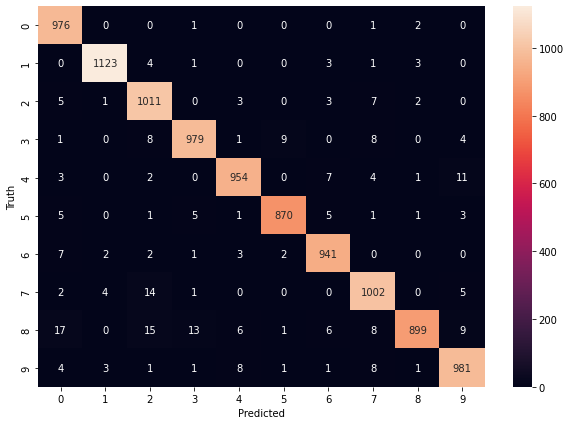

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
###note we are flatenning everytime to overcome special option by keras Using Flatten layer so that we don't have to call .reshape on input dataset


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2684 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [52]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9776


[0.0790272206068039, 0.9775999784469604]